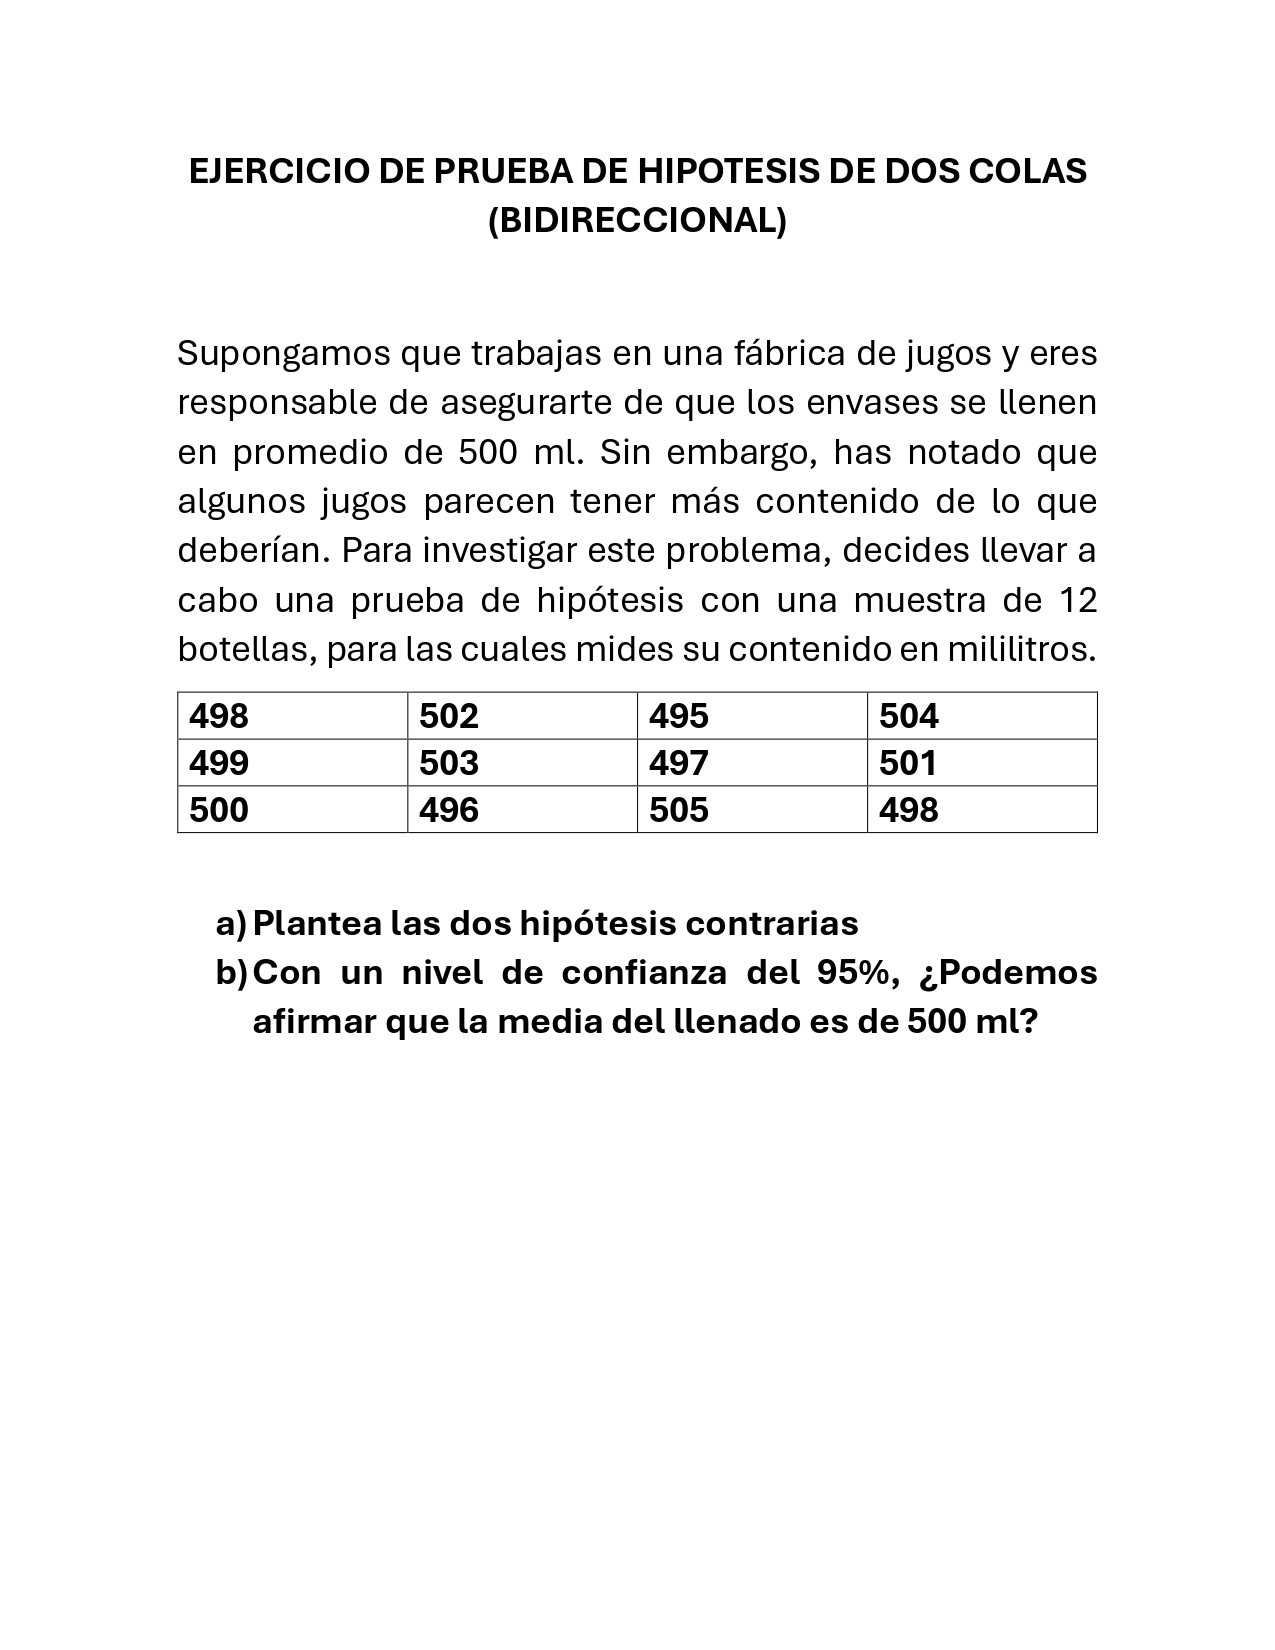

**Solución analítica**

Planteamiento de la hipótesis

$$H_0 - \mu = 500$$
$$H_a - \mu \neq 500$$

La media de los datos proporcionados en la tabla es de
$$\bar{X}=\frac{498+499+500+502+503+496+495+497+505+504+501+498}{12}=499.83$$

esto es menor al promedio real que deberia ser de $\mu=500$.

La desviacion estadar es de
$$s=\sqrt\frac{(498-499.83)^2+(499-499.83)^2+(500-499.83)^2+(502-499.83)^2+(503-499.83)^2+(496-499.83)^2+(495-499.83)^2+(497-499.83)^2+(505-499.83)^2+(504-499.83)^2+(501-499.83)^2+(498-499.83)^2}{11}$$
$$=\sqrt\frac{3.3489+0.6889+0.0289+4.7089+10.0489+14.6689+23.3289+8.0089+26.7289+17.3889+1.3689+3.3489}{11}$$
$$=\sqrt\frac{113.6668}{11}=3.2145$$

El estadistico t:
$$t=\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}=\frac{499.83-500}{\frac{3.2145}{\sqrt{12}}}≈-0.1832$$

El valor critico de t para 11 grados de libertad y nivel de confianza al 95% para una prueba de dos colas es $\pm$2.201.

No se rechaza la hipótesis nula. Con un nivel de confianza del 95%, no se puede afirmar que la media del llenado es diferente de 500 ml. No hay evidencia suficiente para decir que el proceso de llenado está desviado del objetivo.

In [1]:
import numpy as np
from scipy import stats

datos = [498, 502, 495, 504, 499, 503, 497, 501, 500, 496, 505, 498]

# Prueba t de una muestra
t_stat, p_valor = stats.ttest_1samp(datos, 500)

print(f"Media: {np.mean(datos):.2f} mL")
print(f"Desviación estándar: {np.std(datos, ddof=1):.2f} mL")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_valor:.3f}")

if p_valor > 0.05:
    print("Conclusión: No se rechaza H₀ (Media = 500 mL)")
else:
    print("Conclusión: Se rechaza H₀")

Media: 499.83 mL
Desviación estándar: 3.21 mL
Estadístico t: -0.180
Valor p: 0.861
Conclusión: No se rechaza H₀ (Media = 500 mL)


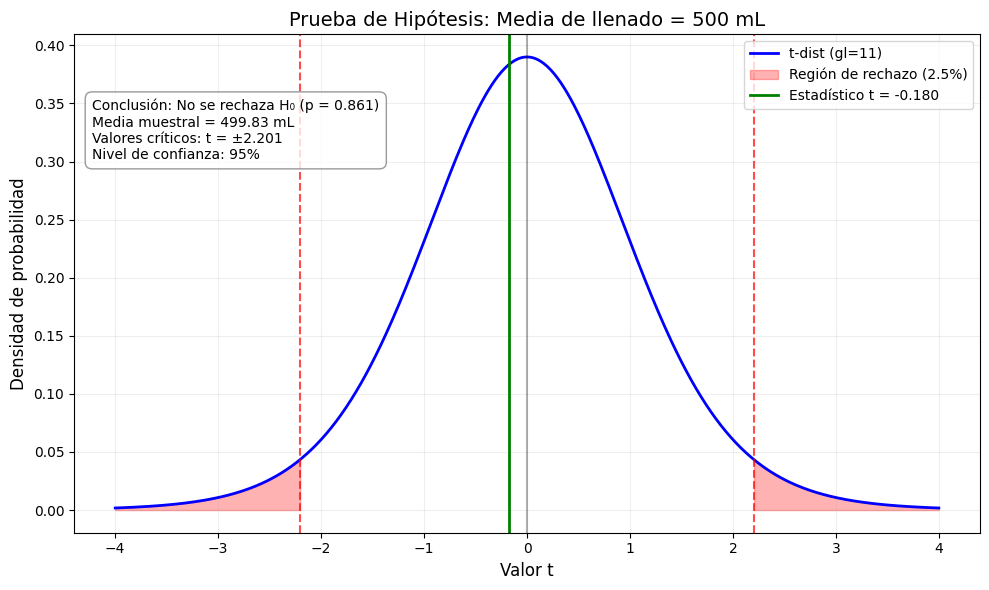

In [3]:
import matplotlib.pyplot as plt

# Datos y cálculos
datos = [498, 502, 495, 504, 499, 503, 497, 501, 500, 496, 505, 498]
n = len(datos)
gl = n - 1  # grados de libertad
media_muestral = np.mean(datos)
t_stat = (media_muestral - 500) / (np.std(datos, ddof=1) / np.sqrt(n))
p_valor = stats.t.sf(np.abs(t_stat), gl) * 2  # Valor p bilateral

# Parámetros de la distribución t
t_critico = stats.t.ppf(0.975, gl)  # Valor crítico (95% confianza)
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, gl)

# Configuración de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label=f't-dist (gl={gl})')

# Regiones críticas
plt.fill_between(x, y, where=(x <= -t_critico), color='red', alpha=0.3, label='Región de rechazo (2.5%)')
plt.fill_between(x, y, where=(x >= t_critico), color='red', alpha=0.3)
plt.axvline(x=-t_critico, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=t_critico, color='r', linestyle='--', alpha=0.7)

# Estadístico t y media
plt.axvline(x=t_stat, color='g', linestyle='-', linewidth=2, label=f'Estadístico t = {t_stat:.3f}')
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)  # Línea en μ=0

# Anotaciones
plt.title('Prueba de Hipótesis: Media de llenado = 500 mL', fontsize=14)
plt.xlabel('Valor t', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.legend()
plt.grid(alpha=0.2)

# Texto informativo
info_text = (
    f'Conclusión: No se rechaza H₀ (p = {p_valor:.3f})\n'
    f'Media muestral = {media_muestral:.2f} mL\n'
    f'Valores críticos: t = ±{t_critico:.3f}\n'
    f'Nivel de confianza: 95%'
)
plt.annotate(info_text, xy=(0.02, 0.75), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()